In [2]:
import pandas as pd
import numpy as np

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from konlpy.tag import Okt

In [6]:
data = pd.read_csv("../../../nlp_poem.csv")
poem = data

contents = poem['content']

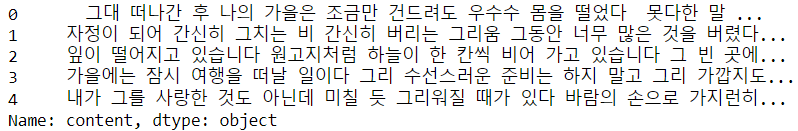

In [11]:
okt = Okt()

# 시 내용 가져오기
contents = poem['content']

# <br>제거, 형태소 분석 후, 시 내용 리스트로 저장
contents = contents.apply(lambda x: x.replace("<br>", " "))

# 학습은 taggedDocument 타입으로 해야하므로 아래와 같이 전처리한다.
tagged_data = [TaggedDocument(words=okt.morphs(_d), tags=[str(i)]) for i, _d in enumerate(contents)]

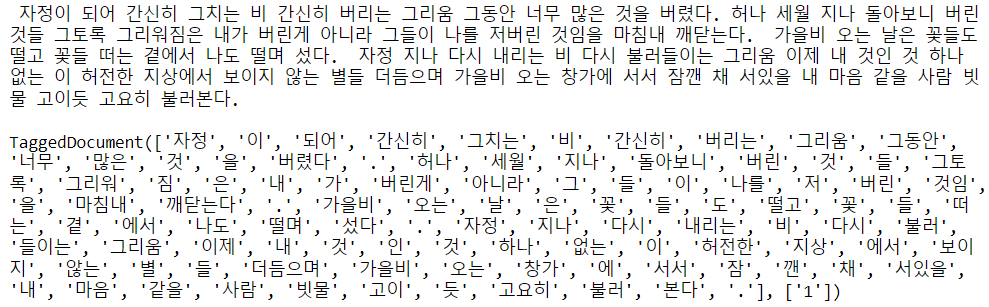

## 모델학습

In [74]:
from tqdm import trange, notebook # show progress-bar
# 모델 설계
max_epochs = 1000
model = Doc2Vec(
    window=15,          #학습할 윈도우 크기
    vector_size=300,
    alpha=0.025, 
    min_alpha=0.025,
    min_count=2,    
    dm =1,
    negative = 5,
    seed = 9999)

#??
model.build_vocab(tagged_data)

# 학습
for epoch in notebook.tqdm(range(max_epochs)):
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

In [79]:
print(model.wv.most_similar('가을'))

[('알려', 0.6581417918205261), ('로운', 0.6459946632385254), ('인양', 0.6368300318717957), ('겨운', 0.634073793888092), ('별', 0.6298066973686218), ('않았다는', 0.6289506554603577), ('幻', 0.6225581765174866), ('우울', 0.6208836436271667), ('침목', 0.6163655519485474), ('오십', 0.616137683391571)]


In [80]:
#비슷한 문장 추천

doc_list = '내가 맨 처음 그대를 보았을 땐 세상엔 아름다운 사람도 살고 있구나 생각하였지요 두'.split(' ')

inferred_vector = model.infer_vector(doc_list)
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=5)
for rd in return_docs:
    print(contents[int(rd[0])]+ '\n')

 당신을 사랑합니다 나날의 삶을 아름답게 해주시고 삶의 고된 일을 보람되게 해주시므로 하루하루가 아무리 고달파도 당신을 떠올리면 미소짓게 해주시므로 당신을 사랑합니다 삶의 순간 순간을 함께 나누시고 당신 곁에서 이야기하고 웃으며 꿈꾸게 해주시므로 당신을 사랑합니다 내 속마음을 말하게 해주시고 내가 말한 뒤의 나의 느낌을 깊이깊이 생각해 주시므로 내 자신을 돌이키게 해주시고 내가 정말 어떤 사람인지를 깨닫도록 도와주시므로 내가 항상 영원하고 참된 이상을 쫓도록 힘을 주시므로 당신을 사랑합니다 사랑의 소망으로 나를 채워 주시고 누구도 줄 수 없는 사랑보다 더 큰 사랑을 내게 주시므로 신께서 정하신 길을 따라 당신의 사랑에 보답할 때 한 인간으로서 내가 지닌 능력들을 모두 일깨워 주시므로 당신을 사랑합니다 당신이 내게 필요할 때 가까이 와주시고 혼자 있어야 할 때 물러나시고 내 나날의 빛과 그림자를 함께 나누시므로 내가 지쳤을 때 위안을 주시고 세상이 너무 힘겨워 보일 때 힘을 주시므로 당신을 사랑합니다 이 모든 것을 다 주시고도 평생을 함께 하겠다고 약속해 주시므로 당신이 계신 까닭에 나는 당신을 사랑한다는 말의 참뜻을 배웠으므로

 호수가 파랄 때는 아주 파랗다 어이 저리도 저리도 파랄 수가 하늘이, 저 하늘이 가을이어라

 사랑이 올 때는 두 팔 벌려안고 갈 때는 노래 하나 가슴속에 묻어놓을 것 추우면 몸을 최대한 웅크릴 것 남이 닦아논 길로만 다니되 수상한 곳엔 그림자도 비추지 말며 자신을 너무 오래 들여다보지 말 것 답이 나오지 않는 질문은 아예 하지도 말며 확실한 쓸모가 없는 건 배우지 말고 특히 시는 절대로 읽지도 쓰지도 말 것 지나간 일은 모두 잊어 버리되 엎질러진 물도 잘 추스려 훔치고 네 자신을 용서하듯 다른 이를 기꺼이 용서할 것 내일은 또 다른 시시한 해가 떠오르리라 믿으며 잘 보낸 하루가 그저 그렇게 보낸 십년 세월을 보상할 수도 있다고, 정말로 그렇게 믿을 것 그러나 태양 아래 새로운 것은 없고 인생은 짧고 하루는 길더라

 길이 너무 멀어